In [48]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import  StandardScaler

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

In [49]:
#Data para make_circles
X, y = make_circles(n_samples=1000, noise=0.1, shuffle=True,  random_state=1)

# Asignamiento de los valres de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1080)

#Escaldo de los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best estimator: SVC(C=1)
Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8387499999999999


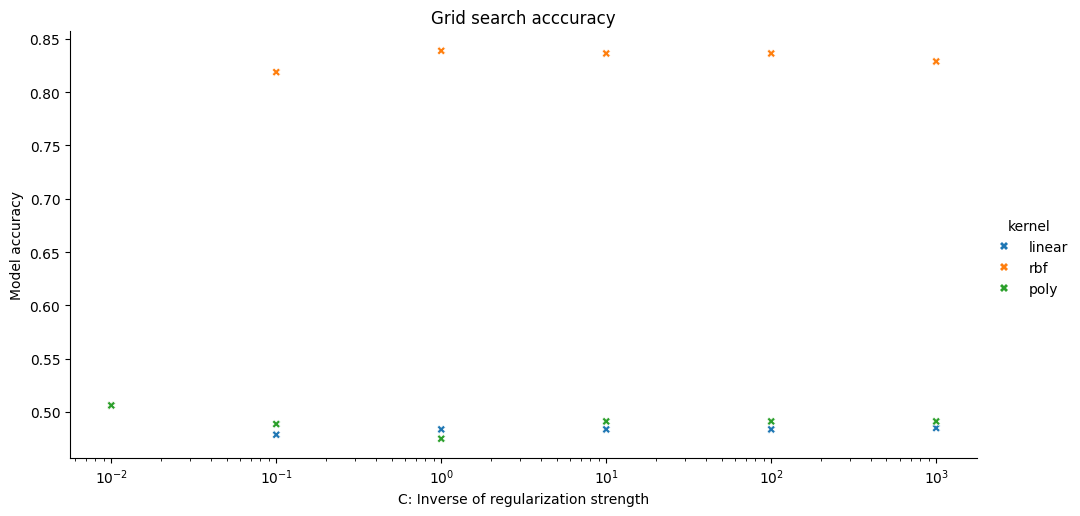

In [50]:
# Creación del Grid search para elegir los mejores parametros 'linear', 'rbf', 'poly' y graficación

# Parametros con diferentes métodos
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}

# Grid Search classifier
classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

# Frontera de clasificación de los metodos del kernel
#Resultados y graficación de los resultados
mean_scores = classifier.cv_results_['mean_test_score']
std_scores = classifier.cv_results_['std_test_score']
kernel = classifier.cv_results_['param_kernel']
c = classifier.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier.best_estimator_))
print('Parameters: ' + str(classifier.best_params_))
print('Accuracy: ' + str(classifier.best_score_))

In [51]:
# Mejor parametro
# Mejor score
# Mejor estimación
classifier.best_params_, classifier.best_score_, classifier.best_estimator_

({'C': 1, 'kernel': 'rbf'}, 0.8387499999999999, SVC(C=1))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        95
           1       0.87      0.87      0.87       105

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



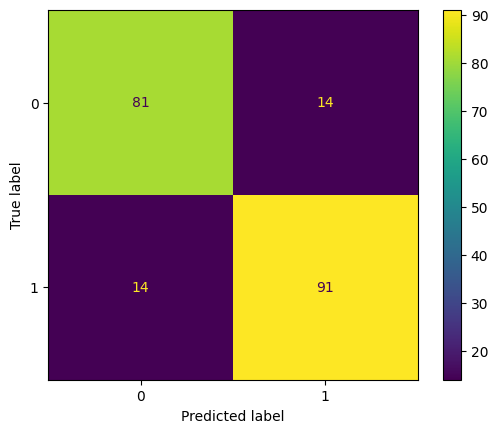

In [52]:
# Matriz de confusión con mejores resultados
# Modelo SVC
model = SVC(kernel='rbf', C=1)
model.fit(X_train_scaled,y_train)
# Confusion matrix
y_predict = model.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [53]:
# Creación del Grid search para elegir los mejores parametros 'linear', 'rbf', 'poly'  con busqueda secuencial

# Parametros con diferentes métodos
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Grid Search classifier
classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [54]:
# Mejor parametro
# Mejor score
# Mejor estimación
classifier.best_params_, classifier.best_score_, classifier.best_estimator_

({'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'},
 0.64125,
 SVC(C=1000, gamma=0.001))

In [55]:
# Data para makes_moons
from sklearn.datasets import make_moons
X, y=make_moons(n_samples=1000, noise=0.1, shuffle=True,  random_state=1)
# Asignamiento de los valres de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1080)

#Escaldo de los datos
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best estimator: SVC(C=10)
Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 1.0


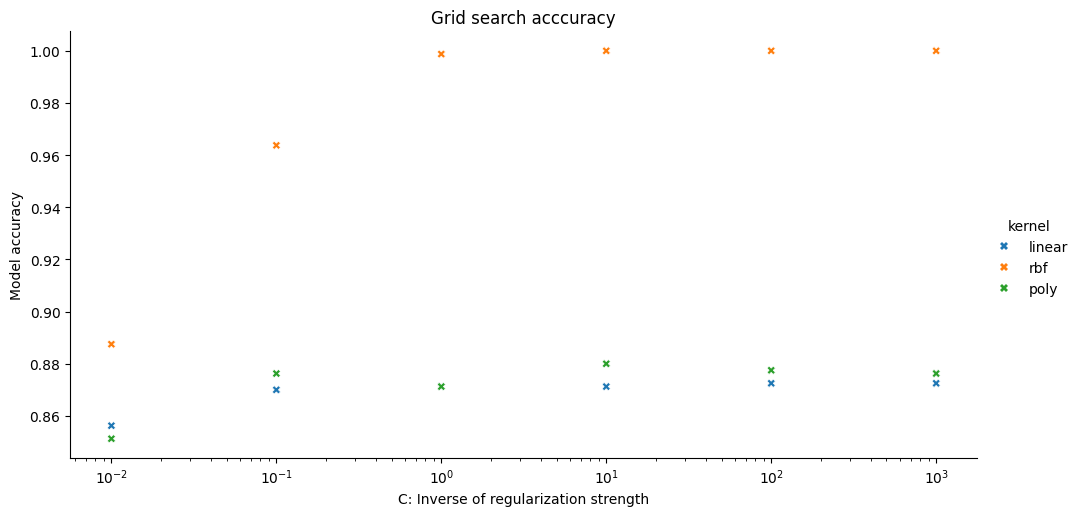

In [56]:
# Creación del Grid search para elegir los mejores parametros, 'linear', 'rbf',

# Parametros con diferentes métodos
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}

# Grid Search classifier

classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)


# Frontera de clasificación de los metodos del kernel
#Resultados y graficación de los resultado
mean_scores = classifier.cv_results_['mean_test_score']
std_scores = classifier.cv_results_['std_test_score']
kernel = classifier.cv_results_['param_kernel']
c = classifier.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier.best_estimator_))
print('Parameters: ' + str(classifier.best_params_))
print('Accuracy: ' + str(classifier.best_score_))

In [57]:
# Mejor parametro
# Mejor score
# Mejor estimación
classifier.best_params_, classifier.best_score_, classifier.best_estimator_

({'C': 10, 'kernel': 'rbf'}, 1.0, SVC(C=10))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        95
           1       1.00      0.99      1.00       105

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



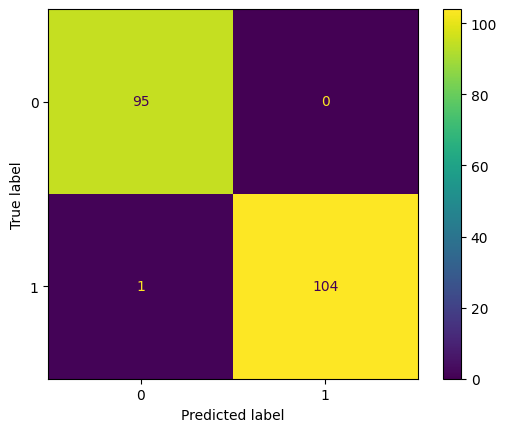

In [58]:
# Matriz de confusión con mejores resultados
# Modelo SVC
model = SVC(kernel='rbf', C=1)
model.fit(X_train_scaled,y_train)
# Confusion matrix
y_predict = model.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [59]:
# Creación del Grid search para elegir los mejores parametros 'linear', 'rbf', 'poly'  con busqueda secuencial

# Parametros con diferentes métodos
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Grid Search classifier
classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [60]:
# Mejor parametro
# Mejor score
# Mejor estimación
classifier.best_params_, classifier.best_score_, classifier.best_estimator_

({'C': 100, 'kernel': 'linear'},
 0.8725000000000002,
 SVC(C=100, kernel='linear'))

In [61]:
#Data para make_bloobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

# Asignamiento de los valres de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1080)

#Escalado
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best estimator: SVC(C=0.01, kernel='linear')
Parameters: {'C': 0.01, 'kernel': 'linear'}
Accuracy: 1.0


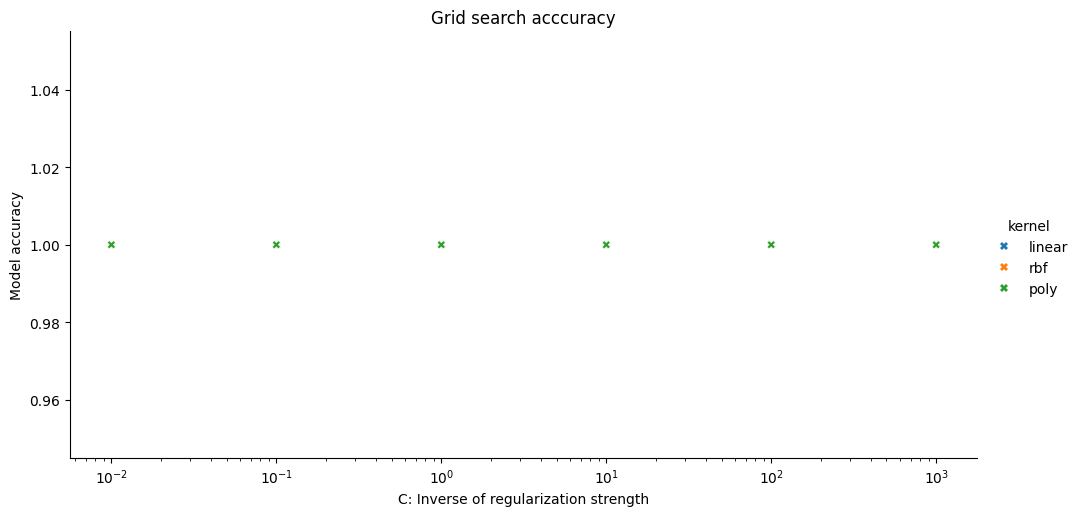

In [62]:
# Creación del Grid search para elegir los mejores parametros, 'linear', 'rbf', 'poly'

# Parametros con diferentes métodos
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}

# Grid Search classifier
classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

# Frontera de clasificación de los metodos del kernel
#Resultados y graficación de los resultado
mean_scores = classifier.cv_results_['mean_test_score']
std_scores = classifier.cv_results_['std_test_score']
kernel = classifier.cv_results_['param_kernel']
c = classifier.cv_results_['param_C'].data

scores = {'C': c, 'kernel':kernel, 'mean_test_score': mean_scores, 'std_test_score': std_scores}
scores_df = pd.DataFrame(data = scores)

ax = sns.relplot(data=scores_df,
                 x='C',
                 y='mean_test_score',
                 marker='X',
                 hue='kernel',
                 height=5,
                 aspect=2)

ax.set(title='Grid search acccuracy', xlabel='C: Inverse of regularization strength', ylabel='Model accuracy', xscale = 'log')

print('Best estimator: '+ str(classifier.best_estimator_))
print('Parameters: ' + str(classifier.best_params_))
print('Accuracy: ' + str(classifier.best_score_))

In [63]:
# Mejor parametro
# Mejor score
# Mejor estimación
classifier.best_params_, classifier.best_score_, classifier.best_estimator_

({'C': 0.01, 'kernel': 'linear'}, 1.0, SVC(C=0.01, kernel='linear'))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       109

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



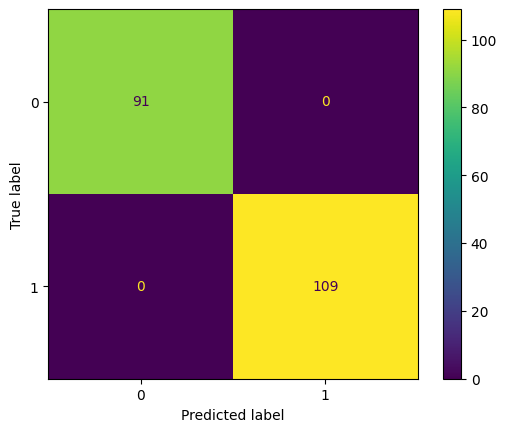

In [64]:
# Matriz de confusión con mejores resultados
# Modelo SVC
model = SVC(kernel='rbf', C=1)
model.fit(X_train_scaled,y_train)
# Confusion matrix
y_predict = model.predict(X_test_scaled)
print(metrics.classification_report(y_test, y_predict))
cm = metrics.confusion_matrix(y_test, y_predict)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [65]:
# Creación del Grid search para elegir los mejores parametros 'linear', 'rbf', 'poly'  con busqueda secuencial

# Parametros con diferentes métodos
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

# Grid Search classifier
classifier = GridSearchCV(estimator = SVC(),
                          param_grid = parameters,
                          scoring='accuracy')
classifier.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             scoring='accuracy')

In [66]:
# Mejor parametro
# Mejor score
# Mejor estimación
classifier.best_params_, classifier.best_score_, classifier.best_estimator_

({'C': 1, 'kernel': 'linear'}, 1.0, SVC(C=1, kernel='linear'))